# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9382 Кузьмин Дмитрий, вариант 27.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путем многократного решения задачи Коши.

## Основные теоретические положения

#### Задача Коши 2-го порядка
Дано: уравнение $y'' = f(x, y, y')$ и три числа $(x_0; y_0; y_1)$.

Требуется найти решение $y(x)$, определенное в окрестности точки $x_0$ и удовлетворяющее условию 

$\begin{cases}
      y(x_0) = y_0 \\
      y'(x_0) = y_1
    \end{cases}$

#### Краевая задача
Дано: уравнение $y'' = f(x, y, y')$, $a < x < b$ и два числа $(y_a; y_b)$

Требуется: найти решение уравнения выше, удовлетворяющее условиям

$\begin{cases}
      y(a) = y_a \\
      y(b) = y_b
    \end{cases}$

## Постановка задачи

Дано дифференциальное уравнение:

$y'' = f(x, y)$, $a < x < b$ (1)

и граничные условия

$y(a) = y_a$, $y(b) = y_b$

Требуется найти решение задачи (1)-(2) и построить его график.
Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a) = y_a$, $y'(a) = h$

План решения основан на многократном решении задачи Коши (1), (3).

Значение решения задачи Коши при $x = b$ является функцией от $h$.
Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться
$y(b, h) = y_b$ (4)

### $y'' = 2^{-x}(x + y)$
### $y_a = 2$
### $y_b = -1$

## Выполнение работы

### Решение задачи Коши для $h$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [17]:
a, b, ya, yb, acc, step, max_step  = 0, 2, 2, -1, 0.001, 0.1, 100

def d2y(U, x):
    return [U[1], np.power(2, -x)*(x + U[0])]

def y_bh(h):
    conditions = [ya, h]
    xs = [a, b]
    ys = odeint(d2y, conditions, xs)[:, 0]
    return ys[-1]

def y_h_plot(h):
    conditions = [ya, h]
    xs = np.linspace(a, b, 100)
    ys = odeint(d2y, conditions, xs)[:, 0]
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(xs,ys);


In [24]:
h0 = 0
print(f'y(b, h0): {y_bh(h0)}')
h1 = h0 + step
print(f'y(b, h1): {y_bh(h1)}')
direction = 1 if y_bh(h1) < y_bh(h0) else -1
direction


y(b, h0): 5.939430619694235
y(b, h1): 6.217030760522305


-1

### Знак шага - отрицательный. Продолжим вычисления $h_m = h_{m-1} - \Delta h$

In [19]:
h_prev = 0
h = h_prev + step

while y_bh(h) > yb:
    h_prev, h = h, h + direction * step 
    
print(y_bh(h), h, h_prev)

-1.0005730322135045 -2.500000000000001 -2.400000000000001


#### Была найдена граница для $h: (-2.5, -2.4)$

### Выполнение процесса половинного деления, пока не выполнится неравенство $|y(b, h_m) - y(b, h_{m-1})| < 0.001$

In [20]:
m, left, right = 0, h, h_prev

while abs(y_bh(left) - y_bh(right)) > acc and m < max_step:
    m += 1
    mid = (left + right) / 2.0
    if y_bh(left) * (y_bh(mid) - yb) > 0:
        left = mid
    else:
        right = mid
    
print(mid, y_bh(mid))
print(m)    


-2.499804687500001 -1.0000308444290087
9


#### Получено значение для $h: -2.4998$ за 9 шагов. 

### График решения 

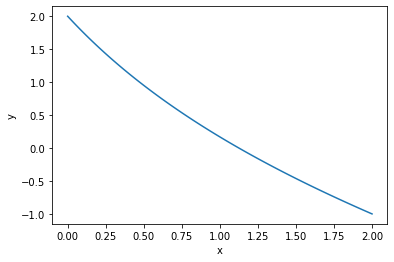

In [21]:
y_h_plot(mid)

## Выводы

В результате выполнения работы были изучены принципы решения краевой задачи для уравнения II-го порядка при помощи задачи Коши